<a href="https://colab.research.google.com/github/Sreelakshmim6/Personal-Projects/blob/main/Travel_Insurance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
model_list={}
import pandas as pd

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean()) 



In [6]:
df=pd.read_csv('C:/Users/Siri/Downloads/heart.csv')

In [ ]:
df.head()

In [ ]:
df.shape

(1500, 16)

In [ ]:
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

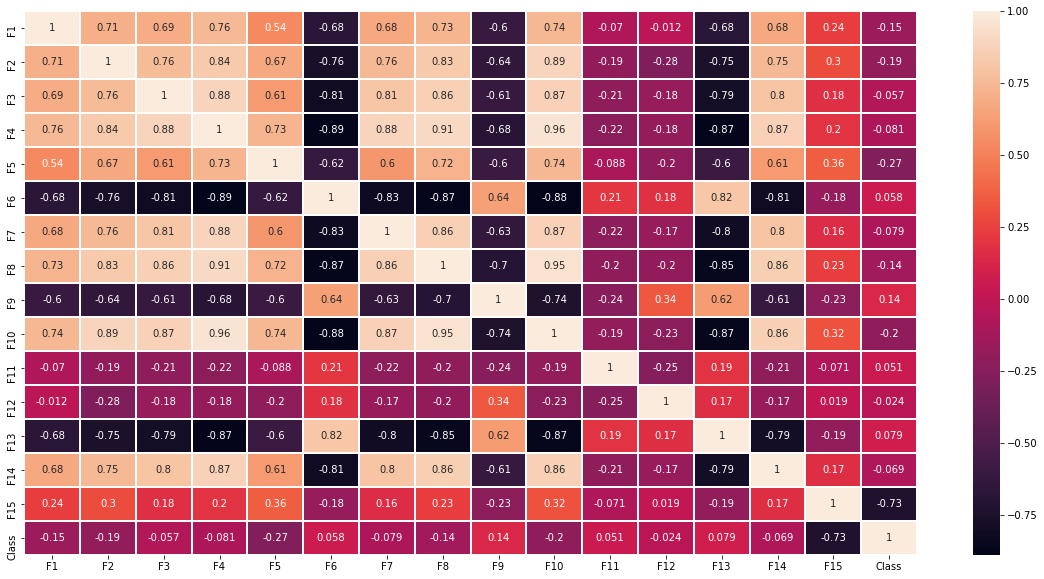

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True,linewidths=1)
# Correlation : F12<F11<F3<F6<F14<F7<F13<F4<F8<F9<F1<F2<F10<F5<F15
#F12 has almost zero corr

In [ ]:
c=df.corr()
c['F15']

F1       0.239084
F2       0.297380
F3       0.175460
F4       0.195861
F5       0.363370
F6      -0.176167
F7       0.161148
F8       0.234449
F9      -0.230740
F10      0.318372
F11     -0.071379
F12      0.019036
F13     -0.187445
F14      0.173578
F15      1.000000
Class   -0.729540
Name: F15, dtype: float64

In [ ]:
#df=df.dropna()
df['F15']=df['F15'].fillna(df['F15'].mean())

In [ ]:
df.dtypes

F1         int64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

In [ ]:
y=df['Class']
y

0       False
1       False
2       False
3       False
4        True
        ...  
1495    False
1496    False
1497     True
1498    False
1499     True
Name: Class, Length: 1500, dtype: bool

In [ ]:
y=y*1 #false=0 ; true=1

In [ ]:
#F12 has the least correlation
x=df.drop(['F12','F13','Class'], axis=1)
x.columns


Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F14', 'F15'],
      dtype='object')

Normalizing the data

In [ ]:
#Scaling the data - BEFORE SPLITTING THE DATA
x=x.apply(lambda v: ( v - v.min()) / (v.max() - v.min()))


Splitting the data


In [ ]:
#split the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x_train.shape,y_train.shape)


(1050, 13) (1050,)


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
#Check the model accuracy -  0.84

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.8022222222222222
Precision: 0.7894736842105263
Recall: 0.7857142857142857


# Parameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
#n_estimators=[100,125,150,200]
max_depth = [2,3,4,5,6,7,8,9,10,11,12,None]

param_grid = {'max_features':['auto',None],'max_depth':max_depth, 'criterion':['gini','entropy']}

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,n_jobs=10)

# fit the grid with data
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
#Getting the best parameters
print(grid.best_params_)


{'criterion': 'entropy', 'max_depth': None, 'max_features': None}


Running the model with the best parameters obtained from previous step

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features= None)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

model_list["DT"]=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.76
Precision: 0.7383177570093458
Recall: 0.7523809523809524


Cross Validation Score

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(clf, x , y, cv=10)
print ('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(clf, x, y, cv=10)

accuracy = metrics.accuracy_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-validated scores: [0.83333333 0.8        0.75333333 0.8        0.84       0.76666667
 0.78       0.76       0.73333333 0.79333333]
Cross-Predicted Accuracy: 0.7806666666666666


# Logistic Regression

In [ ]:
#fit the model based on training data
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=logreg.predict(x_test)

In [ ]:
#to check the model accuracy -  0.8

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

model_list["LogR"]=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.7777777777777778
Precision: 0.7644230769230769
Recall: 0.7571428571428571


# SVM

In [ ]:
#Import svm model
from sklearn import svm
from sklearn.svm import SVC  

#Create a svm Classifier
clf = svm.SVC() # Poly Kernel

#Train the model using the training sets
model=clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7977777777777778
Precision: 0.7605633802816901
Recall: 0.801980198019802


# Parameter tuning using GridSearchCV

In [ ]:
# Parameters for tuning
parameters = [{'kernel': ['rbf','poly','sigmoid'], 'gamma': [1,0.1,0.01,0.001],'C': [0.1,1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svc = GridSearchCV(SVC(), parameters, cv = 5)
svc.fit(x_train, y_train.ravel())

# Checking the score for all parameters
print("Best Parameters are: \n")
svc.best_params_

Tuning hyper-parameters
Grid scores on training set:


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

Running the model with tuned parameters

In [ ]:
clf = svm.SVC(kernel='rbf',C= 1000,gamma=1) # Poly Kernel

model=clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

model_list["SVM"]=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.9066666666666666
Precision: 0.8809523809523809
Recall: 0.9158415841584159


Cross Validation Score

In [ ]:
# Perform 10-fold cross validation
scores = cross_val_score(clf, x , y, cv=10)
print ('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(model, x, y, cv=10)
#plt.scatter(y, predictions)

accuracy = metrics.accuracy_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-validated scores: [0.94666667 0.91333333 0.90666667 0.94666667 0.93333333 0.93333333
 0.90666667 0.84666667 0.92       0.94      ]
Cross-Predicted Accuracy: 0.9193333333333333


# KNN

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

model_list["KNN"]=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.7822222222222223
Precision: 0.8043478260869565
Recall: 0.7047619047619048


# Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))#0.86
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8555555555555555
Precision: 0.8502415458937198
Recall: 0.8380952380952381


# Parameter tuning using GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter values that should be searched
#sample_split_range = list(range(2, 50))
#n_estimators=list(range(100, 200))
n_estimators=[100,125,150,200]
#max_depth=list(range(10, 100))
max_depth = [2,4,6,8,10,12,None]

param_grid = {'n_estimators':n_estimators, 'max_features':['auto'],'max_depth':max_depth, 'criterion':['gini','entropy']}

# instantiate the grid
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=10)

# fit the grid with data
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Examine the best model

# Single best score achieved across all params 
print(grid.best_score_)

# Dictionary containing the parameters
print(grid.best_params_)

print(grid.best_estimator_)

0.8666666666666668
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
#Running the model with best parameters
clf=RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 100)

#Train the model using the training sets 
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
#Accuracy, Precision and Recall after Tuning

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))#0.86
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

model_list["RF"]=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8355555555555556
Precision: 0.8366336633663366
Recall: 0.8047619047619048


In [ ]:
model_list

{'DT': 0.76,
 'LogR': 0.7777777777777778,
 'SVM': 0.8977777777777778,
 'KNN': 0.7822222222222223,
 'RF': 0.8355555555555556}

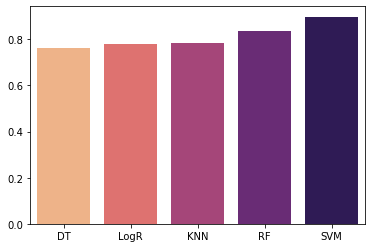

In [ ]:
pd_df = pd.DataFrame(list(model_list.items()))
pd_df.columns =["Model","Accuracy"]
sns.barplot(list(model_list.keys()),list(model_list.values()),order=pd_df.sort_values('Accuracy').Model,palette="magma_r")


In [ ]:
'g1nuplot' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [ ]:
Test2=pd.read_csv("C:\\Users\\Siri\\Desktop\\CE802\\Assignment\\CE802_P2_Data\\CE802_P2_Test.csv")
Test2_original=Test2.copy()

In [ ]:
Test2.isnull().sum()
Test2['F15']=Test2['F15'].fillna(Test2['F15'].mean())
x=Test2.drop(['F12','F13','Class'], axis=1)
x=x.apply(lambda v: ( v - v.min()) / (v.max() - v.min()))

y_pred_test = clf.predict(x)

In [ ]:
y_pred_test

array([ True,  True,  True, ..., False,  True, False])

In [ ]:
#storing the predictions made in the original test file
Test2_original.loc[:,'Class']=y_pred_test

In [ ]:
Test2_original

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4,5.58,-4.66,31.83,69.04,-0.35,-1.29,0.06,-3.67,1,-243.75,0.94,13.84,-1.48,-11.04,True
1,80,37.95,4.40,50.70,199.04,-4.83,5.19,7.25,-4.67,10,-474.75,-3.34,0.46,8.72,NaN,True
2,60,1.08,-4.14,32.13,73.04,0.14,2.01,0.59,-3.67,1,-234.75,-1.08,9.36,-1.20,-11.71,True
3,240,34.95,3.74,44.85,264.04,-2.92,11.52,8.45,-14.67,10,-174.75,-3.20,2.94,4.14,-10.40,False
4,42,4.11,-3.78,31.92,92.04,1.09,-2.67,0.72,-3.67,1,-282.75,-0.40,11.20,0.92,-11.14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,62,5.13,-5.32,32.46,72.04,1.17,-1.62,0.41,0.33,1,-306.75,1.20,9.24,0.96,NaN,False
1496,30,0.69,-3.96,32.70,78.04,-0.16,-0.57,0.01,-1.67,1,-288.75,1.48,9.68,-0.08,NaN,False
1497,94,4.95,-5.38,32.19,91.04,1.99,1.47,0.56,-1.67,1,-252.75,-0.86,12.04,-0.28,NaN,False
1498,70,3.72,-6.82,33.06,74.04,0.50,2.52,0.24,0.33,1,-351.75,-0.08,9.48,0.34,NaN,True


In [ ]:
Test2_original.to_csv("C:\\Users\\Siri\\Desktop\\CE802\\Assignment\\CE802_P2_Data\\CE802_P2_Test.csv")

In [ ]:
cm = metrics.confusion_matrix(y_actual, y_predicted)
